In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Display the first few rows
print(df.head())


Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: 'sales_data_sample.csv'

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Display the first few rows
print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'sales_data_sample.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

# Display the first few rows
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [4]:
# Check data types and missing values
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
# Basic statistics for numerical columns
print(df.describe())

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25% 

In [6]:
# Sales by product line
product_sales = df.groupby('PRODUCTLINE')['SALES'].mean().sort_values(ascending=False)
print(product_sales)

# Sales by country
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
print(country_sales)

PRODUCTLINE
Classic Cars        4053.377104
Trucks and Buses    3746.810100
Motorcycles         3523.831843
Planes              3186.286176
Vintage Cars        3135.339110
Ships               3053.150128
Trains              2938.226883
Name: SALES, dtype: float64
COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64


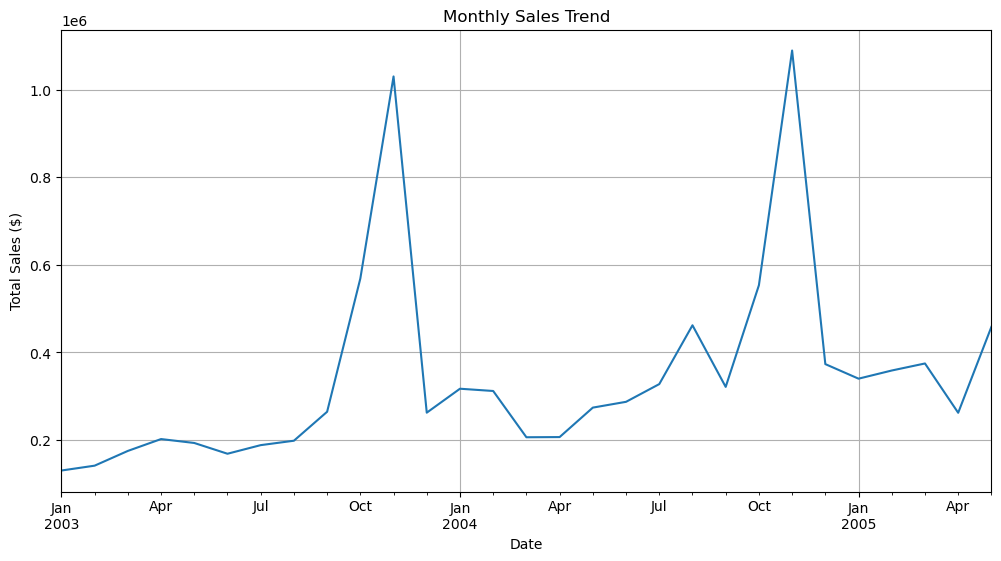

In [7]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Group by month and year
monthly_sales = df.groupby(pd.Grouper(key='ORDERDATE', freq='M'))['SALES'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

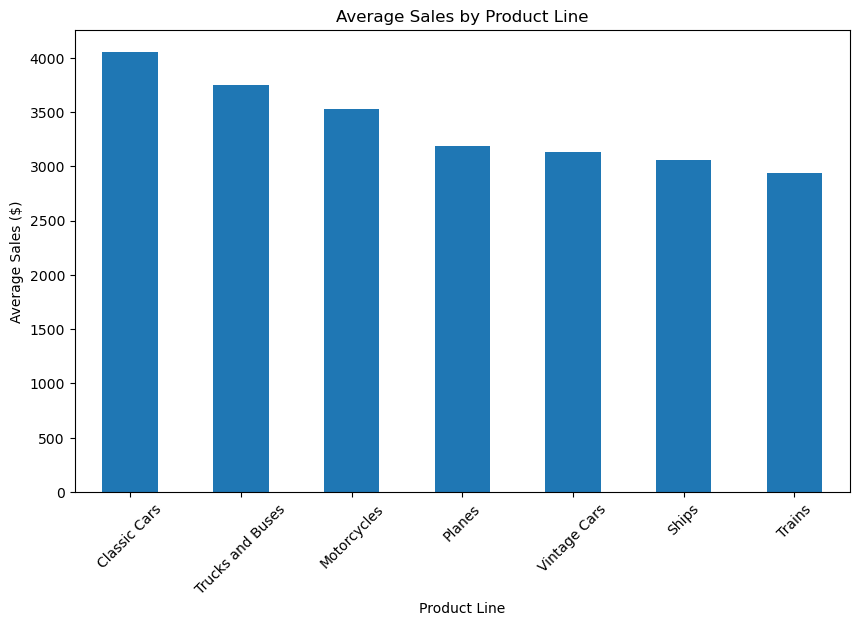

In [8]:
plt.figure(figsize=(10,6))
product_sales.plot(kind='bar')
plt.title('Average Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=45)
plt.show()

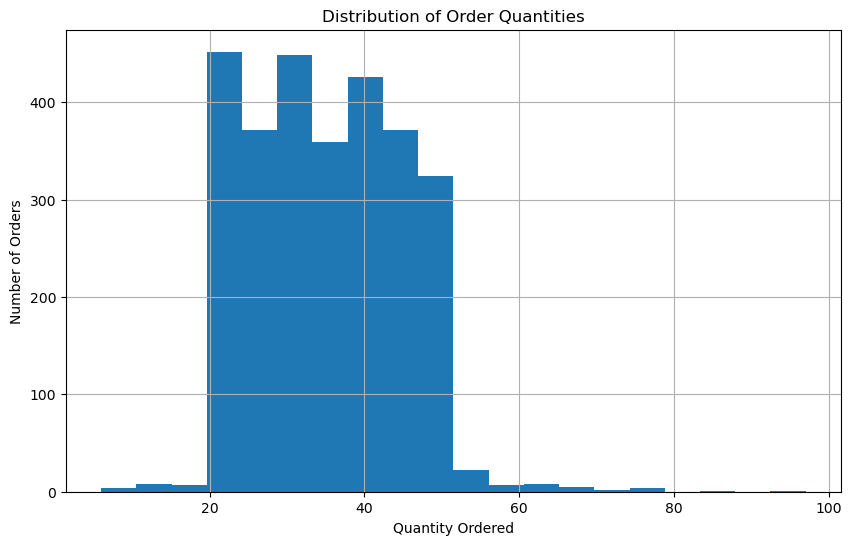

In [9]:
plt.figure(figsize=(10,6))
df['QUANTITYORDERED'].hist(bins=20)
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity Ordered')
plt.ylabel('Number of Orders')
plt.show()


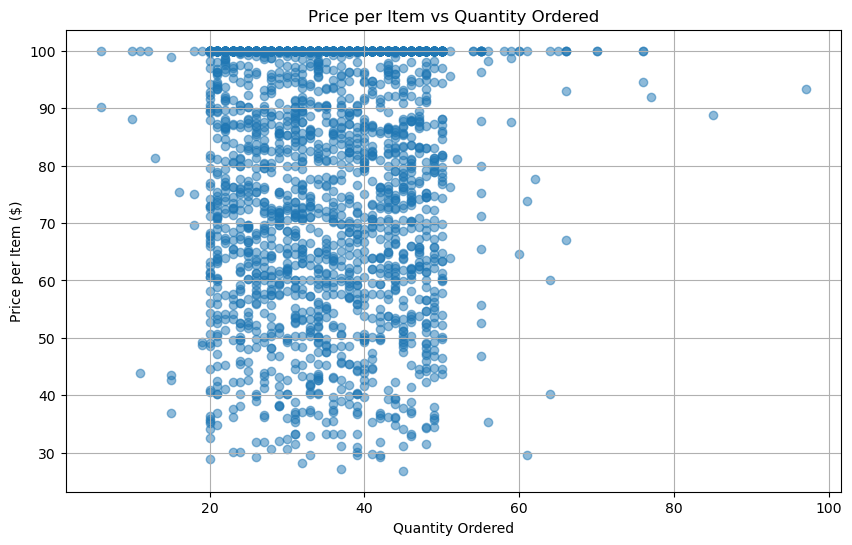

In [10]:
#Scatter Plot - Price vs Quantity Ordered
plt.figure(figsize=(10,6))
plt.scatter(df['QUANTITYORDERED'], df['PRICEEACH'], alpha=0.5)
plt.title('Price per Item vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price per Item ($)')
plt.grid(True)
plt.show()